In [1]:
import os
import sys
import xarray as xr
import dask
import matplotlib.pyplot as plt
import numpy as np
import cmocean.cm as ocm

proj_dir = os.path.join(os.pardir,os.pardir)
data_dir = os.path.join(proj_dir,'data','analysis')

src_dir = os.path.join(proj_dir,'src')
sys.path.append(src_dir)

from visualization.shiftedColorMap import shiftedColorMap

out_path = os.path.join(proj_dir,'reports','figures','resolution_effect.png')

In [2]:
from dask.distributed import Client
C = Client()
C

Client Scheduler: tcp://127.0.0.1:37728 Dashboard: http://127.0.0.1:42102/status,Cluster Workers: 16 Cores: 16 Memory: 101.38 GB


In [2]:
waom10_avg_path = os.path.join(data_dir,'raw','waom10_M3','ocean_avg_0008.nc')
waom10_avg = xr.open_mfdataset(waom10_avg_path)

waom10_grd_path = os.path.join(data_dir,'raw','waom_frc','waom10_grd.nc')
waom10_grd = xr.open_mfdataset(waom10_grd_path)

In [3]:
waom4_avg_path = os.path.join(data_dir,'raw','waom4','ocean_avg_0008.nc')
waom4_avg = xr.open_mfdataset(waom4_avg_path)

waom4_grd_path = os.path.join(data_dir,'raw','waom_frc','waom4_grd.nc')
waom4_grd = xr.open_mfdataset(waom4_grd_path)

In [4]:
waom2_avg_path = os.path.join(data_dir,'raw','waom2_fix','ocean_avg_05??.nc')
waom2_avg = xr.open_mfdataset(waom2_avg_path)

waom2_grd_path = os.path.join(data_dir,'raw','waom_frc','waom2_grd.nc')
waom2_grd = xr.open_mfdataset(waom2_grd_path)

In [5]:
waom10 = waom10_avg.sel(ocean_time='2014-4')
waom4 = waom4_avg.sel(ocean_time='2014-4')
waom2 = waom2_avg.sel(ocean_time='2014-4').mean('ocean_time')

processing
processing
processing


/home/ubuntu/bigStick/anaconda3/envs/antarctic_melting/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)
/home/ubuntu/bigStick/anaconda3/envs/antarctic_melting/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/ubuntu/bigStick/anaconda3/envs/antarctic_melting/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)
/home/ubuntu/bigStick/anaconda3/envs/antarctic_melting/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


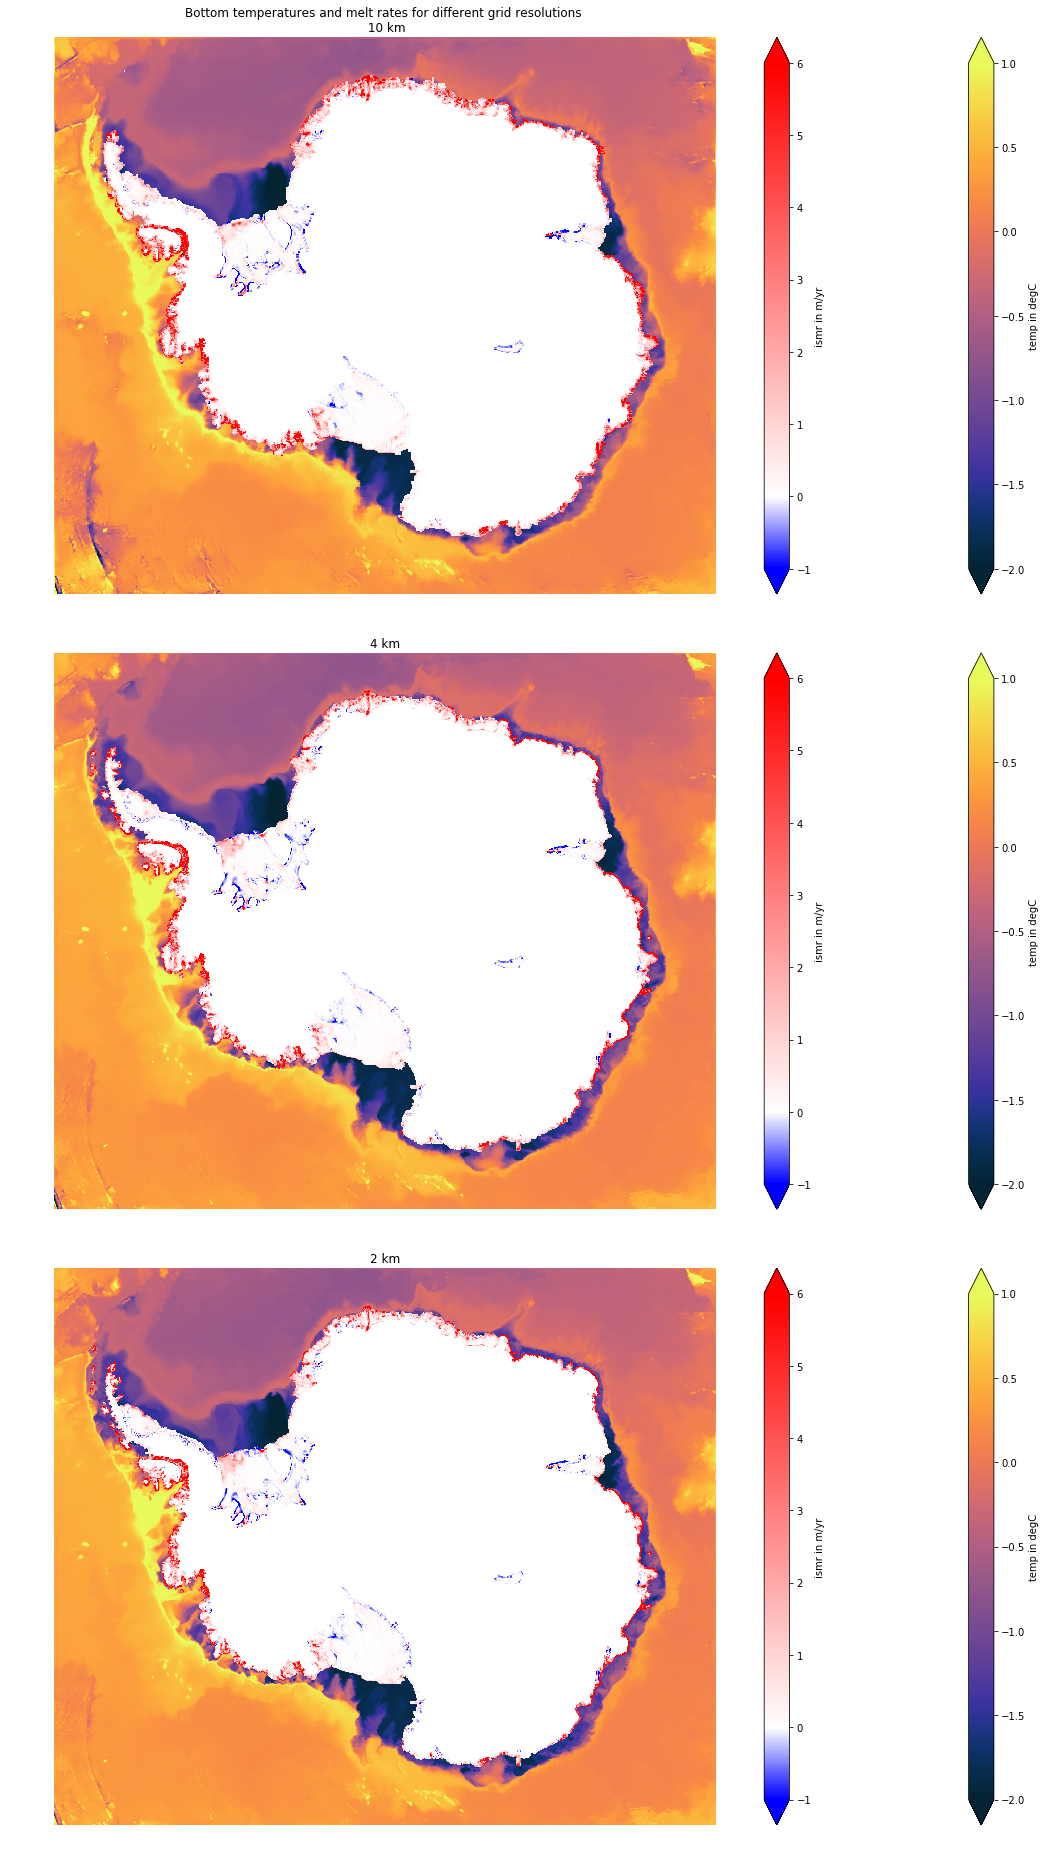

In [6]:
%matplotlib inline
m_min = -1
m_max = 6
m_cmap = shiftedColorMap(plt.cm.bwr,midpoint= (1 - m_max/(m_max + abs(m_min))))

temp_min = -2
temp_max = 1

s2a = 3600*24*365.25

plt.close()
fig,axes = plt.subplots(3,figsize=(17,26))

ax0,ax1,ax2 = axes.flatten()
for res,waom,grd,ax in zip(['10','4','2'],[waom10,waom4,waom2],[waom10_grd,waom4_grd,waom2_grd],axes.flatten()):
    print("processing")
    waom.temp.isel(s_rho=0).where((grd.mask_rho==1)&(grd.zice == 0)).plot(
    ax=ax,vmin=temp_min,vmax=temp_max,cmap=ocm.thermal,cbar_kwargs={'label':'temp in degC'})
    (waom.m.where((grd.mask_rho==1)&(grd.zice < 0))*s2a).plot(
    ax=ax,vmin=m_min,vmax=m_max,cmap=m_cmap,cbar_kwargs={'label':'ismr in m/yr'})
    ax.set_aspect('equal')
    ax.set_title(res+' km')
    ax.axis('off')
ax0.set_title('Bottom temperatures and melt rates for different grid resolutions \n 10 km')
fig.tight_layout()
#plt.savefig(out_path)
plt.show()

In [8]:
%matplotlib inline
m_min = -1
m_max = 6
m_cmap = shiftedColorMap(plt.cm.bwr,midpoint= (1 - m_max/(m_max + abs(m_min))))

temp_min = -2
temp_max = 1

s2a = 3600*24*365.25

def plot_m_bt(waom,grd,res):
    
    plt.close()
    fig,ax = plt.subplots(figsize=(15,8))
    waom.temp.isel(s_rho=0).where((grd.mask_rho==1)&(grd.zice == 0)).plot(
    ax=ax,vmin=temp_min,vmax=temp_max,cmap=ocm.thermal,cbar_kwargs={'label':'temp in degC'})
    (waom.m.where((grd.mask_rho==1)&(grd.zice < 0))*s2a).plot(
    ax=ax,vmin=m_min,vmax=m_max,cmap=m_cmap,cbar_kwargs={'label':'ismr in m/yr'})
    ax.set_aspect('equal')
    ax.set_title(res+' km')
    ax.axis('off')
    ax.set_title('Bottom temperatures and melt rates for '+res+' km grid resolution')
    fig.tight_layout()
    plt.show()

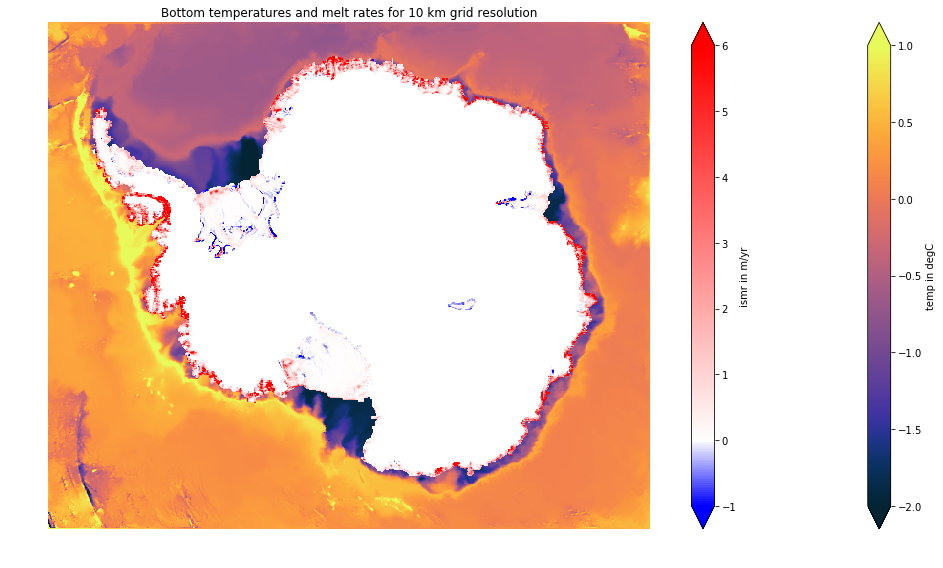

In [9]:
%matplotlib inline
plot_m_bt(waom10,waom10_grd,'10')

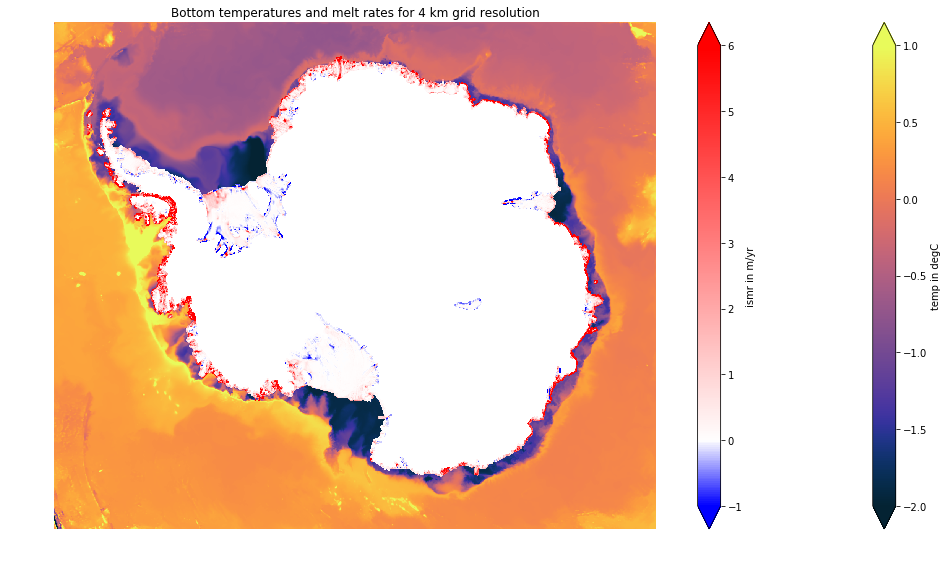

In [10]:
plot_m_bt(waom4,waom4_grd,'4')

/home/ubuntu/bigStick/anaconda3/envs/antarctic_melting/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)
/home/ubuntu/bigStick/anaconda3/envs/antarctic_melting/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/ubuntu/bigStick/anaconda3/envs/antarctic_melting/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)
/home/ubuntu/bigStick/anaconda3/envs/antarctic_melting/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


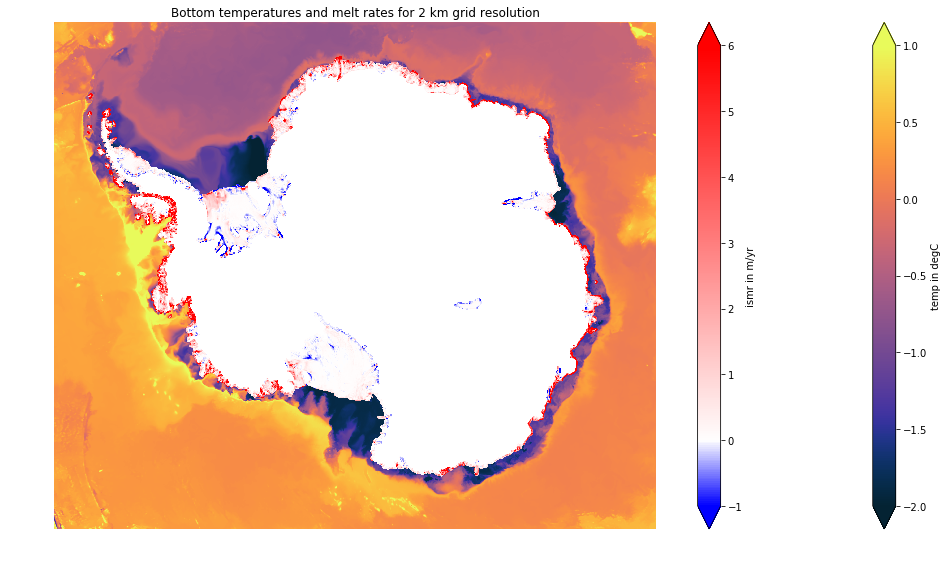

In [11]:
plot_m_bt(waom2,waom2_grd,'2')